In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot
from scipy import stats
import seaborn as sns

In [2]:
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
df_referral = pd.read_csv('./vidas_data/survival_time.csv', parse_dates=['EOH', 'SOH'])

In [3]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
sns.set(font_scale=1.5)

## Use of Megace cor. Appetite ##

In [4]:
# do the merge
df_as = pd.read_csv('./vidas_data/wH_DirectTable_Scala_ESAS.csv', parse_dates=['TimeStamp_Insert'])
df_as = df_as[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'opt_appetito']].dropna().rename(columns={'opt_appetito': 'appetite'})
df_aa = pd.merge(df_referral, df_as, on=['IDEHR', 'EHRType']).dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)

In [5]:
# clean up the entries in the dframes
df_aa.loc[df_aa['appetite'] == 'N.R.', 'appetite'] = np.nan
df_aa['appetite'] = df_aa.appetite.str.findall('(\d+)#')
df_aa['appetite'] = df_aa['appetite'].apply(lambda x: np.nan if isinstance(x, float) else int(x[0]))
df_aa['hos_days'] = pd.to_timedelta(df_aa['TimeStamp_Insert'] - df_aa['SOH']).dt.days
df_aa.astype({'hos_days': 'float32'}).dtypes
df_aa = df_aa.dropna()
df_aa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0.0,233
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1.0,4
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1.0,225
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2.0,28
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2.0,35
...,...,...,...,...,...,...,...,...,...,...
4560,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4.0,4
4561,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4.0,3
4562,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1.0,0
4563,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1.0,5


In [6]:
# importing drug dframes
dd1 = pd.read_csv('./vidas_data/wH_Therapy_JCM_Therapy.csv', parse_dates=['DateTherapy', 'TimeStamp_Insert'])
dd2 = pd.read_csv('./vidas_data/wH_DirectTable_TERAPIE_OUTPAT_VIDAS.csv', parse_dates=['TimeStamp_Insert'])

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# dd1.columns

In [8]:
# clean up data
dd1 = dd1[['IDEHR', 'DateTherapy', 'DrugName', 'Dose', 'ComplementaryCodeDose', 'TimeStamp_Insert']]
dd1 = dd1[dd1['DrugName'].str.contains('MEGACE')]
dd1 = dd1.drop_duplicates().reset_index(drop=True)
# all entries contain the same dosage (160mg)
dd1 = dd1[['IDEHR', 'DrugName', 'TimeStamp_Insert']]
dd1

,IDEHR,DrugName,TimeStamp_Insert
0,1074,MEGACE,2015-02-19 12:16:08.677
1,1074,MEGACE,2015-02-20 07:15:23.203
2,1074,MEGACE,2015-02-21 07:25:37.730
3,1074,MEGACE,2015-02-22 08:03:52.357
4,1074,MEGACE,2015-02-23 08:16:34.217
...,...,...,...
204,5198,MEGACE,2020-06-18 08:04:48.227
205,5198,MEGACE,2020-06-19 09:05:35.427
206,5198,MEGACE,2020-06-20 08:01:43.470
207,5198,MEGACE,2020-06-21 08:00:14.640


In [9]:
dd2 = dd2[['IDEHR', 'opt_farmaco', 'TimeStamp_Insert']]
dd2 = dd2[dd2['opt_farmaco'].str.contains('meges[a-z]+', case=False)]
# all entries contain 160mg of either MEGESTIL or MEGACE
dd2['opt_farmaco'] = 'MEGACE'
# all entries are of AMB
dd2 = dd2.rename(columns={'opt_farmaco': 'DrugName'})
dd2 = dd2.drop_duplicates().reset_index(drop=True)
dd2

,IDEHR,DrugName,TimeStamp_Insert
0,44,MEGACE,2015-01-19 11:02:49.277
1,2231,MEGACE,2015-04-16 22:40:15.103
2,2231,MEGACE,2015-04-17 17:09:48.583
3,1652,MEGACE,2015-04-20 08:49:02.243
4,2248,MEGACE,2015-04-20 17:31:24.037
...,...,...,...
294,28463,MEGACE,2020-05-26 12:24:35.357
295,28463,MEGACE,2020-06-04 09:51:38.593
296,28070,MEGACE,2020-06-23 18:24:10.813
297,26461,MEGACE,2020-07-06 11:13:17.573


In [10]:
# concat both dframes
d_drug = pd.concat([dd1, dd2], ignore_index=True)
d_drug = d_drug.rename(columns={'TimeStamp_Insert': 'DrugTime'})
d_drug.drop_duplicates()

,IDEHR,DrugName,DrugTime
0,1074,MEGACE,2015-02-19 12:16:08.677
1,1074,MEGACE,2015-02-20 07:15:23.203
2,1074,MEGACE,2015-02-21 07:25:37.730
3,1074,MEGACE,2015-02-22 08:03:52.357
4,1074,MEGACE,2015-02-23 08:16:34.217
...,...,...,...
503,28463,MEGACE,2020-05-26 12:24:35.357
504,28463,MEGACE,2020-06-04 09:51:38.593
505,28070,MEGACE,2020-06-23 18:24:10.813
506,26461,MEGACE,2020-07-06 11:13:17.573


In [11]:
print('No. of unique IDEHRs: ', len(d_drug.IDEHR.unique()))

No. of unique IDEHRs:  178


In [12]:
# merge drug df with appetite df
df_cor = pd.merge(df_aa, d_drug, on=['IDEHR'], how='left')
df_cor

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days,DrugName,DrugTime
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0.0,233,NaN,NaT
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1.0,4,NaN,NaT
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1.0,225,MEGACE,2015-12-16 18:59:26.997
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2.0,28,NaN,NaT
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2.0,35,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
4508,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4.0,4,NaN,NaT
4509,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4.0,3,NaN,NaT
4510,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1.0,0,NaN,NaT
4511,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1.0,5,NaN,NaT


In [13]:
# separate into two dfs: one with the usage of megace and the other without
df_c1 = df_cor[df_cor['DrugName'] == 'MEGACE']
df_c2 = df_cor[df_cor['DrugName'] != 'MEGACE']

In [14]:
df_c1

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days,DrugName,DrugTime
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1.0,225,MEGACE,2015-12-16 18:59:26.997
114,3134,2018-11-05 18:50:00,EHR,2018-08-14 17:10:38.117,83.0,Lung,1629,2018-08-16 13:45:00.630,0.0,1,MEGACE,2015-12-04 09:13:38.473
455,3714,2016-01-30 09:58:00,AMB,2015-10-21 12:31:41.467,100.0,Lung,5193,2015-11-30 12:40:47.543,5.0,40,MEGACE,2015-12-03 10:33:58.310
456,3714,2019-08-20 15:25:00,EHR,2019-08-12 10:20:30.957,8.0,Breast,1749,2019-08-17 11:17:03.113,4.0,5,MEGACE,2015-12-03 10:33:58.310
467,3736,2019-09-10 11:35:00,EHR,2019-08-27 09:47:14.353,14.0,Breast,1748,2019-08-29 13:01:48.523,0.0,2,MEGACE,2019-08-29 11:51:21.883
...,...,...,...,...,...,...,...,...,...,...,...,...
4364,28070,2020-07-02 08:00:40,AMB,2020-04-30 18:30:15.927,62.0,Breast,1748,2020-06-24 13:37:39.180,0.0,54,MEGACE,2020-06-23 18:24:10.813
4389,28243,2020-05-24 06:55:30,AMB,2020-05-11 14:05:33.613,12.0,Brain-Snc,1919,2020-05-14 23:57:58.537,8.0,3,MEGACE,2020-05-12 11:33:25.157
4390,28243,2020-05-24 06:55:30,AMB,2020-05-11 14:05:33.613,12.0,Brain-Snc,1919,2020-05-14 23:57:58.537,8.0,3,MEGACE,2020-05-20 11:23:38.420
4421,28463,2020-06-06 04:00:51,AMB,2020-05-20 17:42:30.647,16.0,Lung,1629,2020-05-21 11:27:02.720,5.0,0,MEGACE,2020-05-26 12:24:35.357


In [15]:
df_c2

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days,DrugName,DrugTime
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0.0,233,NaN,NaT
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1.0,4,NaN,NaT
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2.0,28,NaN,NaT
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2.0,35,NaN,NaT
5,2853,2016-01-21 18:30:00,AMB,2015-09-03 12:10:44.877,140.0,Pancreas,1579,2015-10-02 15:18:47.473,5.0,29,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
4508,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4.0,4,NaN,NaT
4509,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4.0,3,NaN,NaT
4510,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1.0,0,NaN,NaT
4511,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1.0,5,NaN,NaT


In [16]:
# get the list of patients under megace and ones without
id_meg = df_c1.IDEHR.unique()
id_nmeg = df_c2.IDEHR.unique()
print(list(set(id_meg) & set(id_nmeg)))

[]


In [17]:
df_c3 = df_c1[['hos_days', 'appetite']].groupby(by=['hos_days']).mean().reset_index()
df_c4 = df_c2[['hos_days', 'appetite']].groupby(by=['hos_days']).mean().reset_index()

In [18]:
m_num = len(df_c1.IDEHR.unique())
mn_num = len(df_c2.IDEHR.unique())

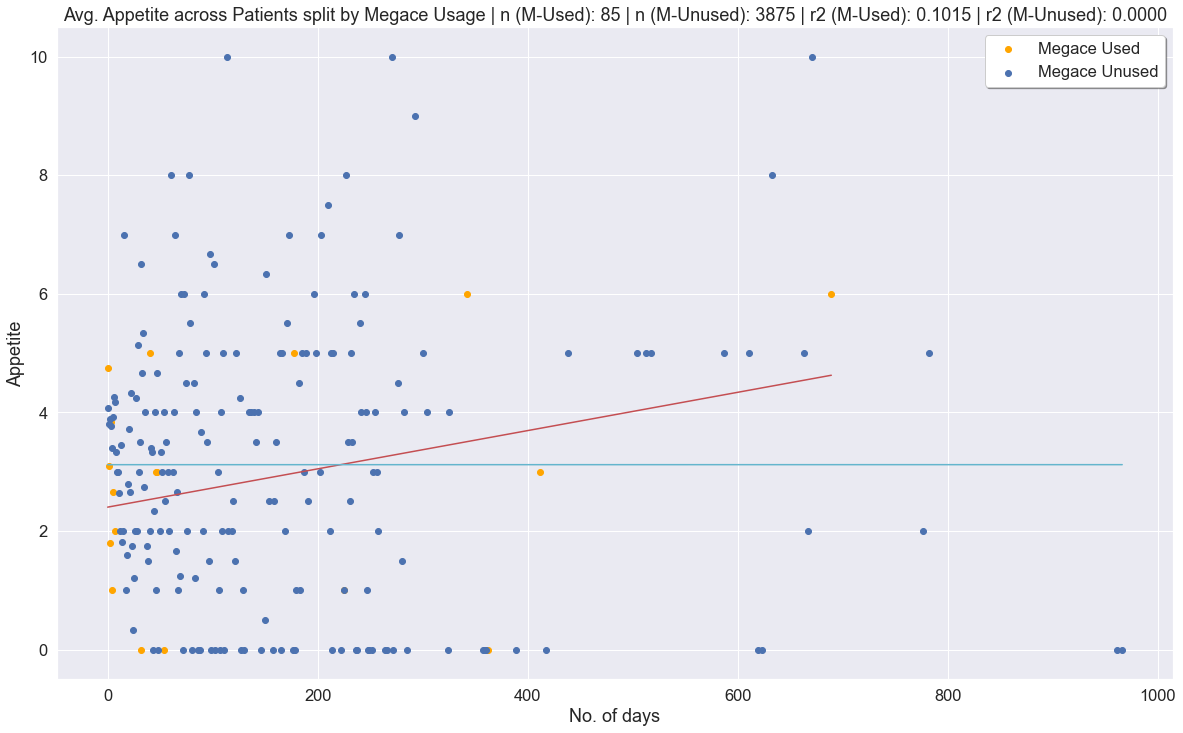

In [20]:
# get the appetite regplots split by megace usage
fig, ax = plt.subplots()
x_ehr = df_c3['hos_days']
y_ehr = df_c3['appetite']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
l1 = ax.scatter(x_ehr, y_ehr, color='orange')
ax.plot(x_ehr, slope*x_ehr + intercept, color='r')
x_amb = df_c4['hos_days']
y_amb = df_c4['appetite']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
l2 = ax.scatter(x_amb, y_amb, color='b')
ax.plot(x_amb, slope*x_amb + intercept, color='c')
ax.legend((l1, l2), ('Megace Used', 'Megace Unused'), loc='best', shadow=True, facecolor='w')
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Avg. Appetite across Patients split by Megace Usage | n (M-Used): ' + str(m_num) + ' | n (M-Unused): ' + str(mn_num) + ' | r2 (M-Used): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (M-Unused): " + "{:.4f}".format(r_value_amb ** 2))
plt.show()

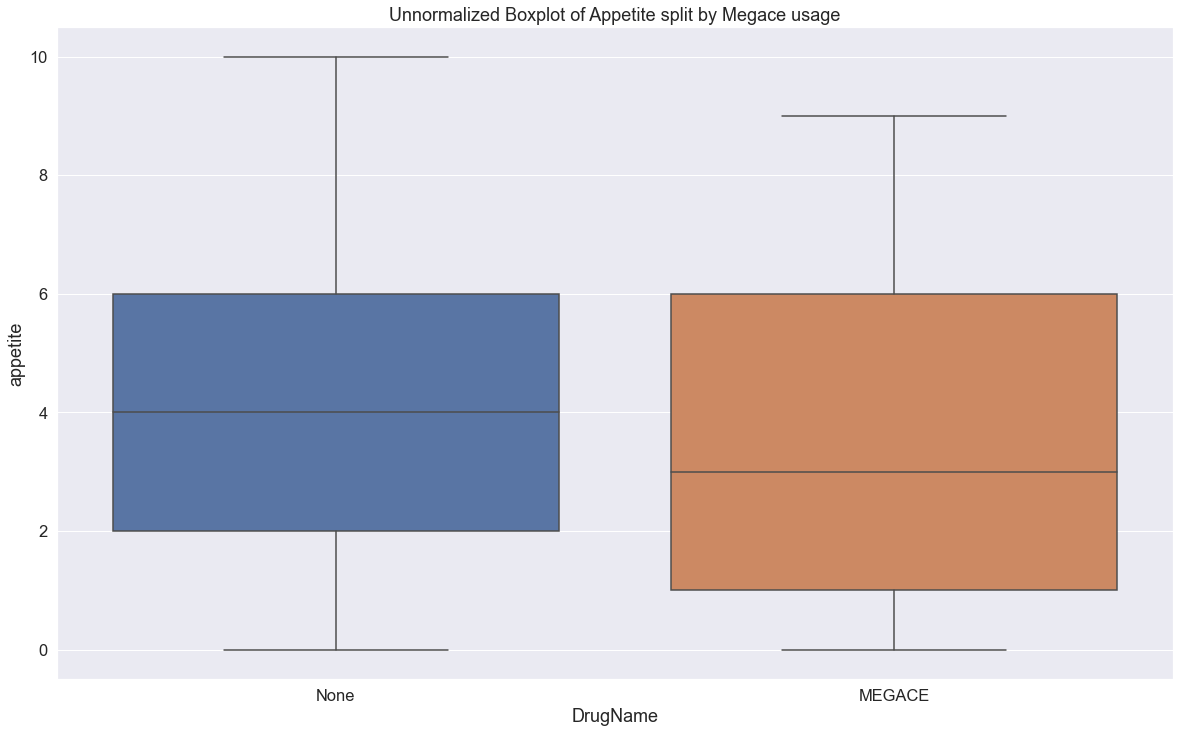

In [23]:
# boxplot for appetite distribution split by megace usage
df_cor.loc[df_cor['DrugName'] != 'MEGACE', 'DrugName'] = 'None'
fig, ax = plt.subplots()
sns.boxplot(x='DrugName', y='appetite', data=df_cor, ax=ax)
ax.set_title('Unnormalized Boxplot of Appetite split by Megace usage')
plt.show()

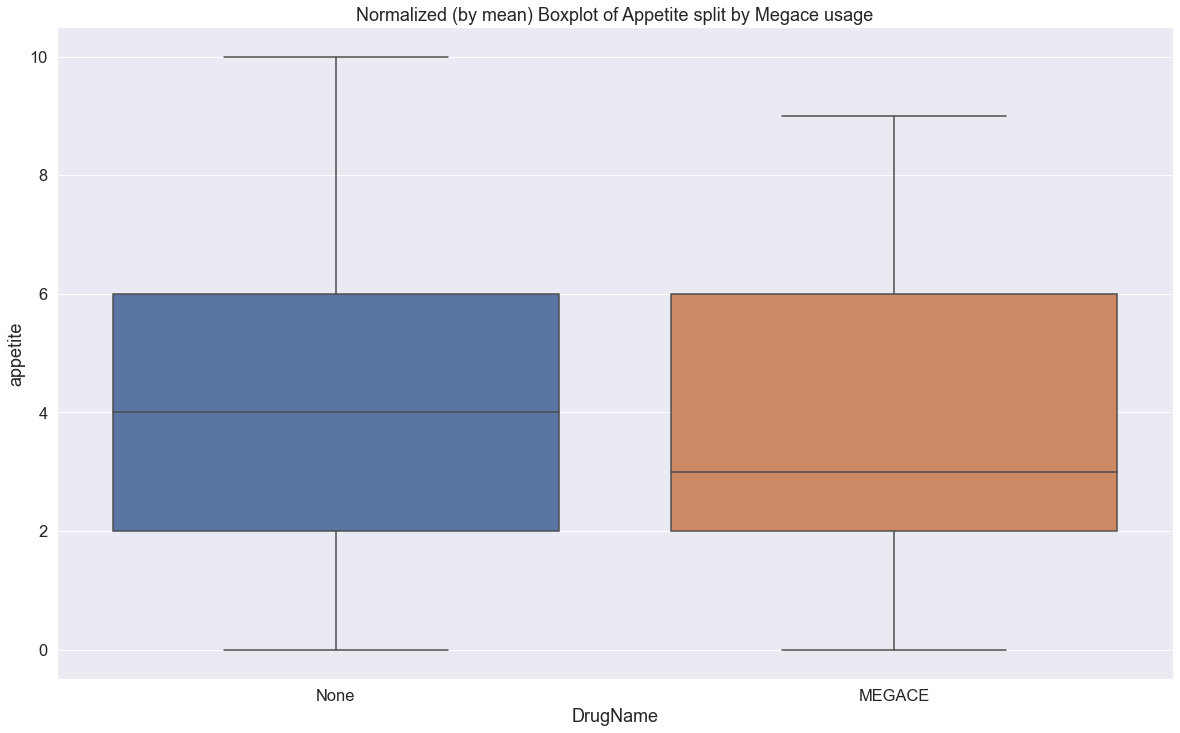

In [31]:
dft = df_cor[['IDEHR', 'appetite', 'DrugName']].groupby(by=['IDEHR', 'DrugName']).mean().reset_index()
fig, ax = plt.subplots()
sns.boxplot(x='DrugName', y='appetite', data=dft, ax=ax)
ax.set_title('Normalized (by mean) Boxplot of Appetite split by Megace usage')
plt.show()

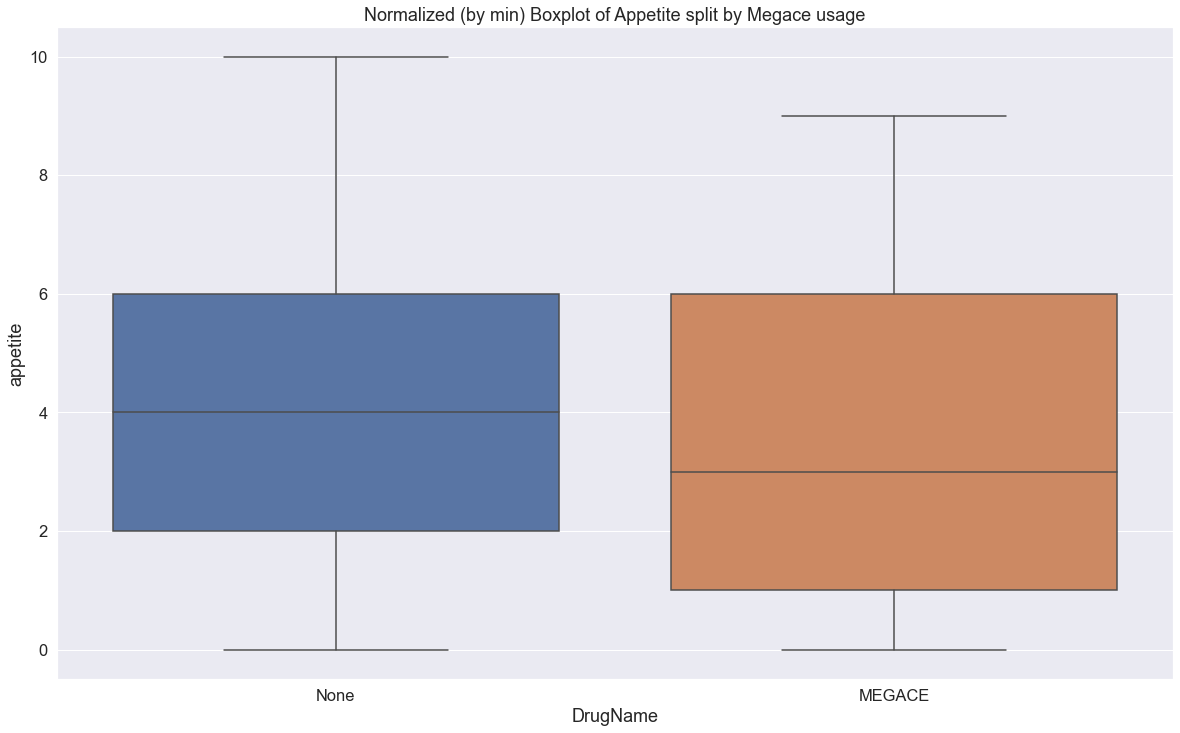

In [29]:
dft = df_cor[['IDEHR', 'appetite', 'DrugName']].groupby(by=['IDEHR', 'DrugName']).min().reset_index()
fig, ax = plt.subplots()
sns.boxplot(x='DrugName', y='appetite', data=dft, ax=ax)
ax.set_title('Normalized (by min) Boxplot of Appetite split by Megace usage')
plt.show()

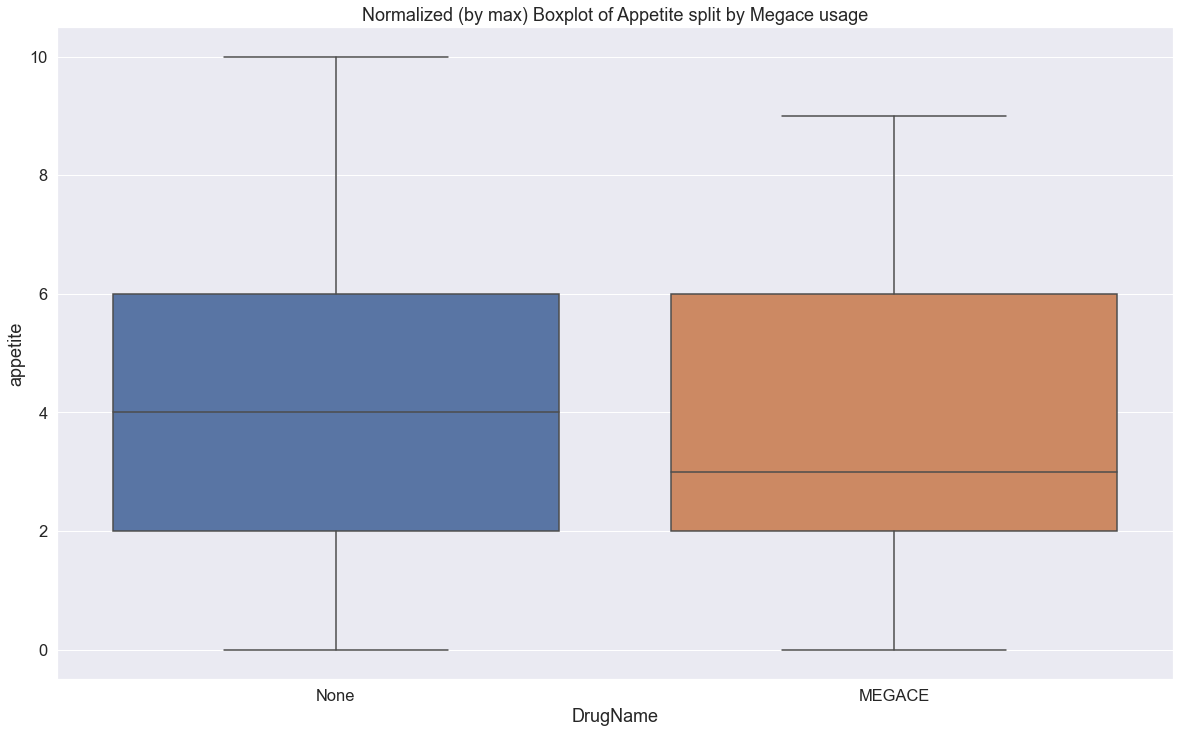

In [30]:
dft = df_cor[['IDEHR', 'appetite', 'DrugName']].groupby(by=['IDEHR', 'DrugName']).max().reset_index()
fig, ax = plt.subplots()
sns.boxplot(x='DrugName', y='appetite', data=dft, ax=ax)
ax.set_title('Normalized (by max) Boxplot of Appetite split by Megace usage')
plt.show()